In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("customer_booking.csv", encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [25]:
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

X_categorical = df[categorical_cols]
X_numerical = df.drop(columns=categorical_cols)

In [26]:
X_categorical['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [27]:
X_categorical['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [28]:
counts = X_categorical['route'].value_counts()
mask = X_categorical['route'].isin(counts[counts < 650].index)
X_categorical['route'][mask] = 'Other'

X_categorical['route'].value_counts()

/var/folders/sv/_kgrn0q96tjfh0j08_hlstp00000gn/T/ipykernel_11237/3633046547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical['route'][mask] = 'Other'


Other     41314
AKLKUL     2680
PENTPE      924
MELSGN      842
ICNSIN      801
DMKKIX      744
ICNSYD      695
DMKPER      679
DPSICN      666
DMKOOL      655
Name: route, dtype: int64

In [29]:
counts = X_categorical['booking_origin'].value_counts()
mask = X_categorical['booking_origin'].isin(counts[counts < 1000].index)
X_categorical['booking_origin'][mask] = 'Other'

X_categorical['booking_origin'].value_counts()

/var/folders/sv/_kgrn0q96tjfh0j08_hlstp00000gn/T/ipykernel_11237/2236451792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical['booking_origin'][mask] = 'Other'


Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Other           3259
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
Singapore       1044
Name: booking_origin, dtype: int64

In [31]:
X_categorical['flight_day'].value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [32]:
weekday_mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

X_categorical['flight_day'] = X_categorical['flight_day'].apply(lambda x: weekday_mapping[x])

/var/folders/sv/_kgrn0q96tjfh0j08_hlstp00000gn/T/ipykernel_11237/3584434319.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical['flight_day'] = X_categorical['flight_day'].apply(lambda x: weekday_mapping[x])


In [33]:
# Use pandas get_dummies() to perform one-hot encoding
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

In [34]:
df = pd.concat([X_numerical, X_categorical_encoded], axis=1)

In [35]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

In [44]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred = rf_classifier.predict(X_validation)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_validation, y_pred)
print("Validation accuracy:", accuracy)

Validation accuracy: 0.8522


In [59]:
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': df.drop(columns=['booking_complete']).columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                       Feature  Importance
1                purchase_lead    0.226438
3                  flight_hour    0.169062
2               length_of_stay    0.147151
8                   flight_day    0.108358
7              flight_duration    0.088293
0               num_passengers    0.058637
25     booking_origin_Malaysia    0.045873
6        wants_in_flight_meals    0.023848
5         wants_preferred_seat    0.020789
4          wants_extra_baggage    0.017604
9         sales_channel_Mobile    0.013654
19                 route_Other    0.009758
27        booking_origin_Other    0.008853
23    booking_origin_Indonesia    0.008595
31     booking_origin_Thailand    0.006307
21        booking_origin_China    0.006153
20                route_PENTPE    0.005953
28    booking_origin_Singapore    0.005494
24        booking_origin_Japan    0.004827
29  booking_origin_South Korea    0.004610
22        booking_origin_India    0.003846
30       booking_origin_Taiwan    0.003493
12         

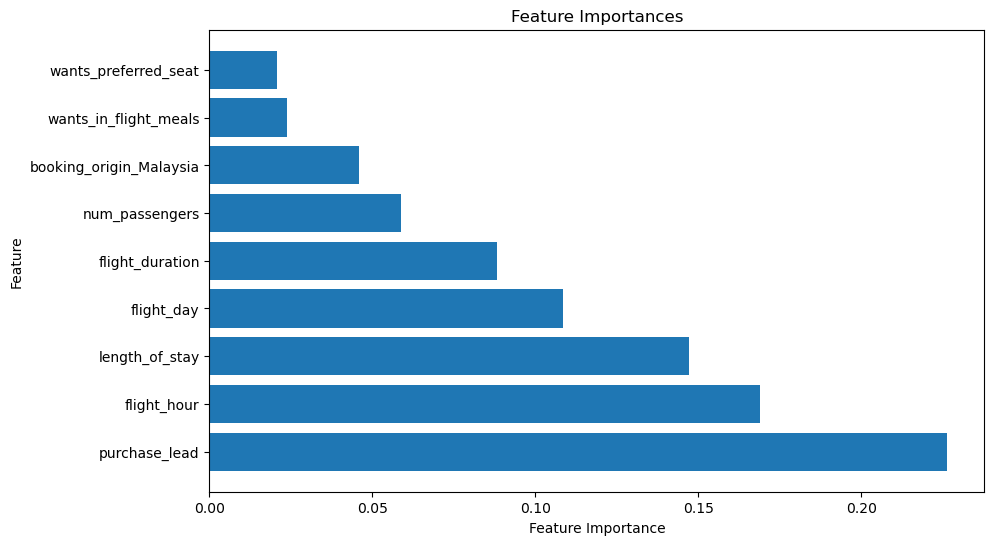

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df.loc[ :5, 'Feature'], feature_importance_df.loc[ :5, 'Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()